In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/jildiz/opt/anaconda3/lib/python3.8/site-packages (0.0)
You should consider upgrading via the '/Users/jildiz/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

You should consider upgrading via the '/Users/jildiz/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [16]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [21]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [22]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

# Select your features (columns)

In [70]:
# Set features. This will also be used as your x values.
X = df[["koi_period","koi_time0bk","koi_impact", "koi_duration","koi_depth","koi_prad","koi_insol","koi_steff","koi_slogg","koi_srad"]]


# Create a Train Test Split

Use `koi_disposition` for the y values

In [71]:
y = df["koi_disposition"]

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [73]:
X_train.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_insol,koi_steff,koi_slogg,koi_srad
6122,6.768901,133.077240,0.150,3.61600,123.1,1.24,253.30,5737,4.327,1.125
6370,0.733726,132.020050,0.291,2.30900,114.6,0.86,2891.64,5855,4.578,0.797
2879,7.652707,134.460380,0.970,79.89690,641.1,3.21,226.81,6328,4.481,0.963
107,7.953547,174.662240,0.300,2.63120,875.4,2.25,55.37,4768,4.536,0.779
29,4.959319,172.258529,0.831,2.22739,9802.0,12.21,349.40,5712,4.359,1.082


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [74]:
# Scale your data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X.shape

(6991, 10)

In [75]:
y.shape

(6991,)

In [97]:
#Scale data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

X_scaler1 = MinMaxScaler().fit(X_train)
X_train_scaled1 = X_scaler1.transform(X_train)
X_test_scaled1 = X_scaler1.transform(X_test)
X.shape



(6991, 10)

# Train the Model with SVC(different kernels)

## 1. Linear

In [76]:
from sklearn.svm import SVC 
model1 = SVC(kernel='linear')
model1.fit(X_train_scaled, y_train)
print(f"Training Data Score: {model1.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model1.score(X_test_scaled, y_test)}")

Training Data Score: 0.584016784283807
Testing Data Score: 0.5652173913043478


## 2. Model RBF

In [77]:
# Create the SVC Model
from sklearn.svm import SVC 
model2 = SVC(kernel='rbf')
model2.fit(X_train_scaled,y_train)
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")


Training Data Score: 0.640663742132367
Testing Data Score: 0.6344393592677345


## 3. Model Poly

In [78]:
model3 = SVC(kernel='poly')
model3.fit(X_train_scaled,y_train)
print(f"Training Data Score: {model3.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model3.score(X_test_scaled, y_test)}")

Training Data Score: 0.5226015639900821
Testing Data Score: 0.4977116704805492


## 4. Decision Tree Classifier

In [79]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
model4 = clf.fit(X_train, y_train)
model4.score(X_test, y_test)

0.6189931350114416

## 5. RandomForestClassifier

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
model5 = rf.fit(X_train, y_train)
model5.score(X_test, y_test)

0.7013729977116705

## 6. Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
model6 = LogisticRegression()
model6.fit(X_train, y_train)
print(f"Training Data Score: {model6.score(X_train, y_train)}")
print(f"Testing Data Score: {model6.score(X_test, y_test)}")


Training Data Score: 0.6032805645622735
Testing Data Score: 0.5949656750572082


/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [82]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [83]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.621, total=   0.9s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.600, total=   0.9s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.622, total=   0.9s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.604, total=   0.9s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.601, total=   1.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.525, total=   0.9s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.514, total=   0.9s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.519, total=   0.9s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.518, total=   0.9s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   41.5s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             verbose=3)

In [84]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.0001}
0.6095720024159687


In [85]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)
print('Test Acc: %.3f' % grid.score(X_test, y_test))

Test Acc: 0.601


In [86]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["CANDIDATE","FALSE POSITIVE","CONFIRMED"]))

                precision    recall  f1-score   support

     CANDIDATE       0.45      0.31      0.36       411
FALSE POSITIVE       0.57      0.44      0.49       484
     CONFIRMED       0.65      0.84      0.73       853

      accuracy                           0.60      1748
     macro avg       0.56      0.53      0.53      1748
  weighted avg       0.58      0.60      0.58      1748



## Try KNN Classifier

In [87]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [99]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    


k: 1, Train/Test Score: 1.000/0.588
k: 3, Train/Test Score: 0.781/0.600
k: 5, Train/Test Score: 0.737/0.610
k: 7, Train/Test Score: 0.716/0.619
k: 9, Train/Test Score: 0.701/0.625
k: 11, Train/Test Score: 0.690/0.621
k: 13, Train/Test Score: 0.686/0.614
k: 15, Train/Test Score: 0.681/0.621
k: 17, Train/Test Score: 0.673/0.620
k: 19, Train/Test Score: 0.668/0.628
k: 21, Train/Test Score: 0.667/0.629
k: 23, Train/Test Score: 0.663/0.625
k: 25, Train/Test Score: 0.666/0.624
k: 27, Train/Test Score: 0.665/0.632
k: 29, Train/Test Score: 0.664/0.630


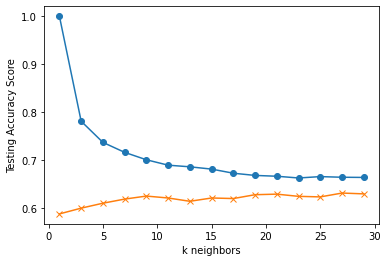

In [100]:
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'SVM.sav'
joblib.dump(your_model, 'SVM.sav')